<h2>Visualizacion de los datos</h2>

<h2>Importar modulos</h2>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

<h2>Cargar el dataset</h2>

In [6]:
from inf_bancaria.config import clean_data_path

In [7]:
df = pd.read_csv(clean_data_path)

<h2>Estadísticas de los datos</h2>


In [8]:
df_group = df.groupby(by="TIPO_CTE", as_index=False).agg(
    freq_tipo_cte=("TIPO_CTE", 'count'),
    mean_score_cte=("SCORE_CLIENTE", 'mean'),
    mean_score_comportamiento=("SCORE_COMPORTAMIENTO", 'mean'),
    mean_edad=("EDAD", 'mean'),
    mean_ingreso=("INGRESO_INFERIDO", 'mean'),
)
df_group

,TIPO_CTE,freq_tipo_cte,mean_score_cte,mean_score_comportamiento,mean_edad,mean_ingreso
0,BUENO,786,225.118321,736.290076,42.423664,43361.092875
1,MALO,2856,97.661765,0.000000,42.678221,42478.729342
2,REGULAR,474,222.778481,731.107595,42.590717,43492.172996


In [9]:
from inf_bancaria.graphs import distribution

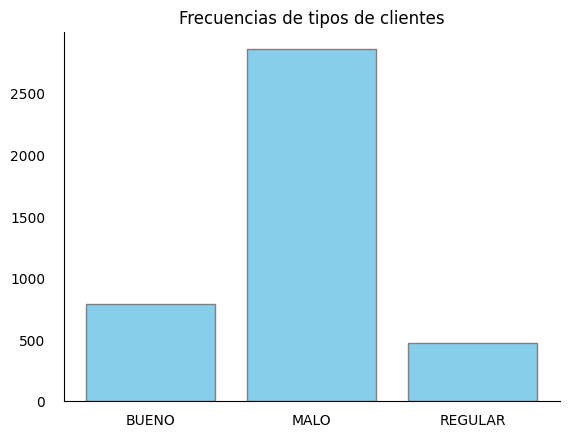

In [10]:
distribution(df_group["TIPO_CTE"], df_group["freq_tipo_cte"], "Frecuencias de tipos de clientes")

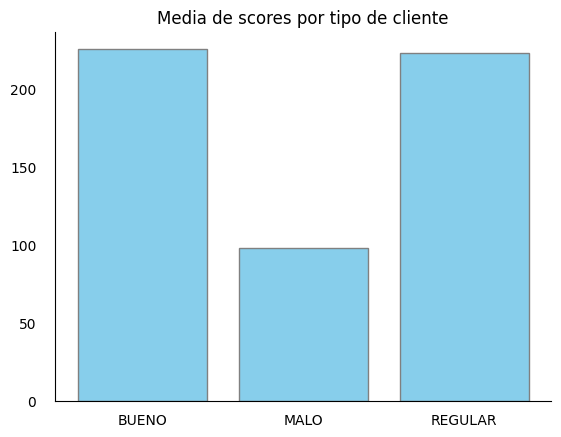

In [11]:
distribution(df_group["TIPO_CTE"], df_group["mean_score_cte"], "Media de scores por tipo de cliente")

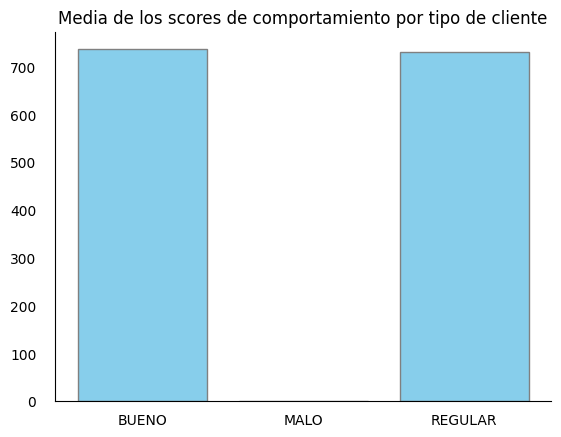

In [12]:
distribution(df_group["TIPO_CTE"], df_group["mean_score_comportamiento"], "Media de los scores de comportamiento por tipo de cliente")

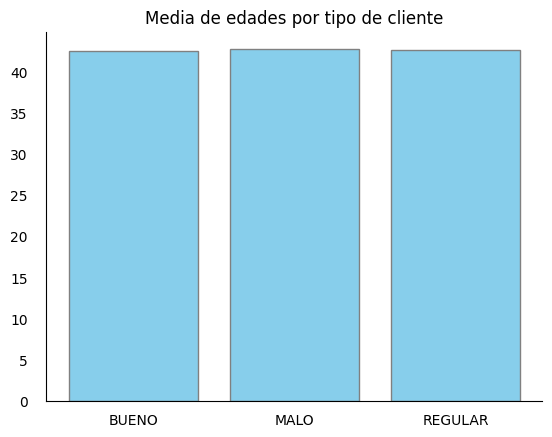

In [13]:
distribution(df_group["TIPO_CTE"], df_group["mean_edad"], "Media de edades por tipo de cliente")

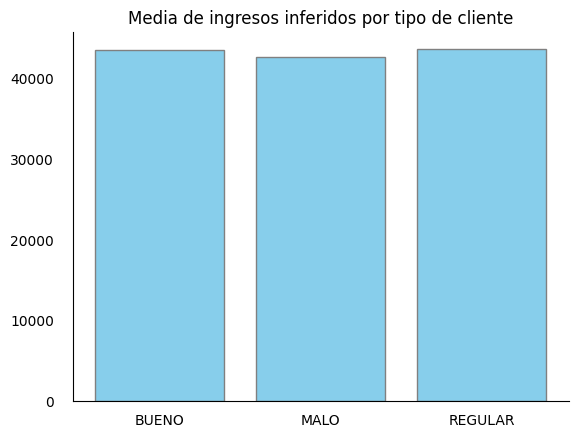

In [14]:
distribution(df_group["TIPO_CTE"], df_group["mean_ingreso"], "Media de ingresos inferidos por tipo de cliente")

<h2>Correlaciones de las variables numéricas</h2>


In [15]:
correlations = df[["INGRESO_INFERIDO","SCORE_CLIENTE","SCORE_COMPORTAMIENTO","EDAD"]].corr()
correlations

,INGRESO_INFERIDO,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,EDAD
INGRESO_INFERIDO,1.000000,0.016701,0.017849,0.936956
SCORE_CLIENTE,0.016701,1.000000,0.966514,-0.010292
SCORE_COMPORTAMIENTO,0.017849,0.966514,1.000000,-0.008234
EDAD,0.936956,-0.010292,-0.008234,1.000000


In [16]:
from inf_bancaria.graphs import heatmap

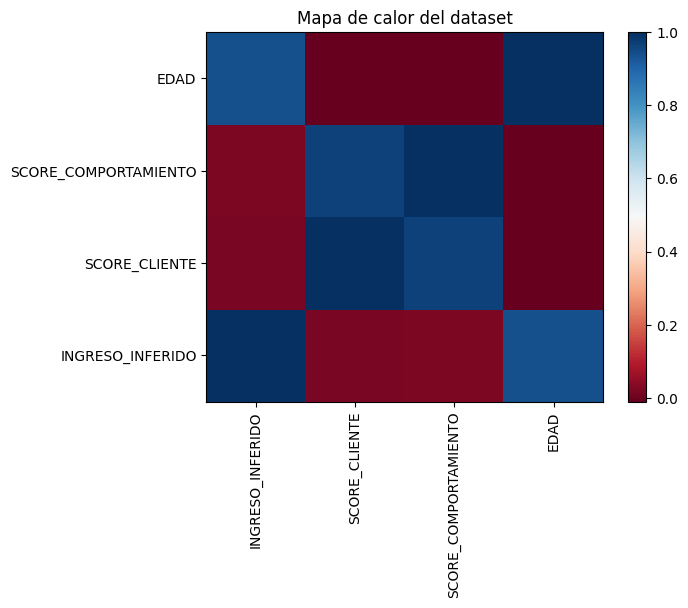

In [17]:
heatmap(correlations, "Mapa de calor del dataset")

<h3>Edad vs Ingreso inferido</h3>

In [18]:
from inf_bancaria.graphs import scatter

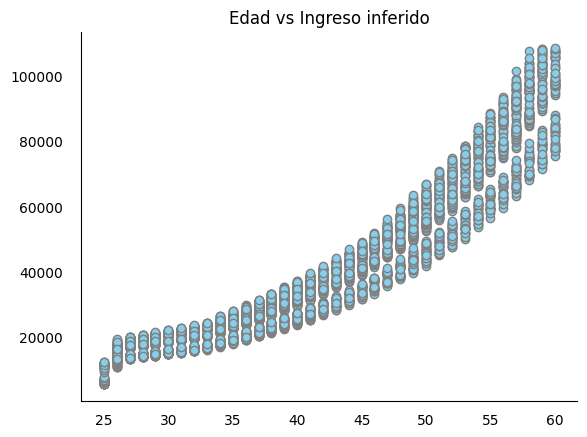

In [19]:
scatter(df["EDAD"], df["INGRESO_INFERIDO"], "Edad vs Ingreso inferido")

<p>...</p>

<h3>Score del cliente vs Score de comportamiento</h3>

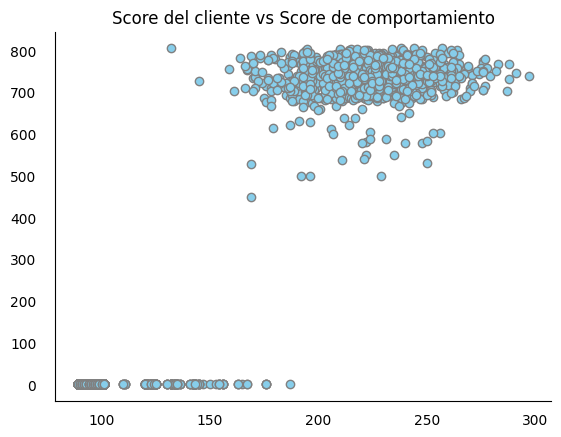

In [20]:
scatter(df["SCORE_CLIENTE"], df["SCORE_COMPORTAMIENTO"], "Score del cliente vs Score de comportamiento")